# Day 1 — First Neural Network (MNIST)

**Objective:** Build and train a simple fully-connected neural network using TensorFlow/Keras on the MNIST dataset.  

In [2]:
# --- Imports ---
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

MNIST includes 60,000 training images and 10,000 test images. Each image is 28×28 pixels (grayscale).
We will load data using `keras.datasets.mnist.load_data()` which returns NumPy arrays.

In [3]:
#load MNIST dataset (60,000 training images, 10,000 test images)

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Quick checks (shapes and dtypes)
print("x_train shape:", x_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("x_train dtype:", x_train.dtype)   # usually uint8
print("y_train sample labels:", y_train[:10])

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_train dtype: uint8
y_train sample labels: [5 0 4 1 9 2 1 3 1 4]


## Normalize inputs

Pixel values are 0–255. Scale them to 0–1 for stable and faster training. 
We also convert to float32 which is the typical dtype used during training.

In [4]:
# Normalize (scale pixels 0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("After normalization dtype:", x_train.dtype, "min/max:", x_train.min(), x_train.max())

After normalization dtype: float64 min/max: 0.0 1.0


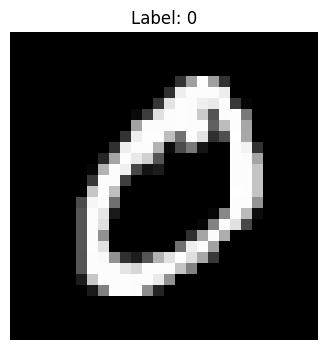

In [5]:
# Visualizing a sample image
plt.figure(figsize=(4,4))
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.axis('off')
plt.show()

## Build the model

Architecture:
- Flatten 28×28 → 784 vector
- Dense(128) with ReLU activation → hidden layer
- Dense(10) with Softmax → output probabilities for 10 classes

We could inspect the layer parameter counts with `model.summary()`.

In [6]:
#building a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten image to 1D
    keras.layers.Dense(128,activation='relu'),  #hidden layer with 128 neurons
    keras.layers.Dense(10,activation='softmax')  #output layer: 10 class probabilities
])

model.summary()

d:\40-Daya-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

- Optimizer: Adam (adaptive, works well).
- Loss: sparse categorical crossentropy (use when labels are integers 0..n-1).
- Metrics: accuracy.

In [7]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

We train for a few epochs and use `validation_split=0.1` to reserve 10% of training data for validation.
`History` will contain training and validation loss/accuracy per epoch.

In [8]:
# Train
history = model.fit(x_train, y_train, 
                    epochs=5, 
                    validation_split=0.1  # reserves 10% of x_train/y_train for validation
                    )

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9218 - loss: 0.2727 - val_accuracy: 0.9658 - val_loss: 0.1266
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1203 - val_accuracy: 0.9727 - val_loss: 0.0954
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9746 - loss: 0.0844 - val_accuracy: 0.9753 - val_loss: 0.0886
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0630 - val_accuracy: 0.9767 - val_loss: 0.0857
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0471 - val_accuracy: 0.9760 - val_loss: 0.0826


## Evaluate on test set

Evaluate the trained model on `x_test` to get test loss and test accuracy.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0828
Test Loss: 0.0828
Test Accuracy: 0.9742


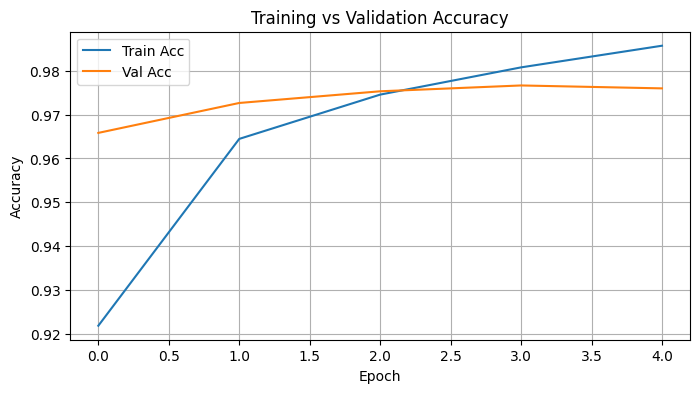

In [10]:
#Plotting training & validation accuracy

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()